## Full run with conduino, probes ANK1 and ANK2, low N

Probe ANK1 upstream and ANK2 downstream, both near canyons heads and no dye. Profiler probe P.

* 400 g salt into bucket 1
* Table profile f0=0.70, dt1=16.8s, f1=0.75, dt2=50, f2=0.78 rad/s.
* Taking water samples at two locations on shelf (break B and canyon head-ish distance A) to measure density throughout spin-up to check if drift in conduino readings is real.
* Profiler now has a guiding tube (PVC) to prevent it from swinging during casts. You need to push the probe down a bit during downcasts to make sure probe and cable don't get stuck at tube.   
* Conduino measurements every 30 min.

RECALIBRATE FOR NEXT EXPERIMENT BECAUSE PROBE ANK2 WAS COMPROMISED WHILE CLEANING UP TANK AFTER THIS EXPERIMENT!

### Stratification

Bucket 1 , 400 g salt

$\rho_1= 1.01430$ g cm$^{-3}$

$\rho_2= 0.99604$ g cm$^{-3}$

### Tank filling
Started: 10:05 am, ended: 11:35 am.

### Conduino measurements
Conduino measurements

|time|What for?|file|
|:--:|:-------:|:--:|
|11:45|profile|profile_before_spinup.mat|
|12:30|check up|checkup_12_30_2.mat|
|13:00|check up|checkup_13_00_2.mat|
|13:30|check up|checkup_13_30_2.mat|
|14:00|check up|checkup_14_00_2.mat|

### Density samples

|time| $\rho$ station A (g cm$^{-3}$)| $\rho$ station B (g cm$^{-3}$)|
|:--:||:--:||:--:|
|11:45|1.00688|- bubble|
|12:30|1.00603|1.00738|
|13:00|1.00529|1.00685|
|13:30|1.00429|1.00668|
|14:00|1.00474|1.00637|
|14:30|1.00521|1.00666|






In [41]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [42]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [43]:
def time2dist(max_depth, time):
    '''Convert time of measurement to distance - Not correct yet because 
    profiles goes faster at the top and slower at the bottom 
    so dt to dx conversion factor is not constant '''
    depth = np.zeros(np.shape(time))
    time_norm = time-time[0]
    depth = (time_norm * max_depth) / np.max(time_norm)
    return(depth)

def densP(reading):
    ''' Calibration from 29 feb 2019 in calibration_29mar19.ipynb. Returns density fitted using a 3rd deg polynomial.
    Input - reading::array
    Output - fitP::array of size [reading]'''
    fitP = 0.997378+(0.006040*reading)+(0.001648*reading**2)+(0.000105*reading**3)
    return(fitP)

Probes ANK1 upstream and ANK2 downstream. Both near head

|Channel|Probe|
|::|::|
|'ch1':|ANK1|
|'ch2':|ANK2|
|'ch3':|P|



In [44]:
def dens_ANK1(read):
    '''Calibration from 29 March 2019 in calibration_29mar19.ipynb'''
    rho_1 = 0.997387+0.004844*read+0.000312*read**2+0.000204*read**3 
    return(rho_1)

def dens_ANK2(read):
    '''Calibration  from 29 March 2019 in calibration_29mar19.ipynb '''
    rho_2 = 0.997311+0.006653*read+0.003429*read**2+-0.000041*read**3 # March 29, after knocking off
    #rho_2 = 0.982289+0.041039*read-0.010799*read**2+0.002785*read**3 # March 21st, Ashu's calibration, values are too high
    return(rho_2)

def plot_uprofile(ax):
    ax.axvline(16.8, color='0.8', linestyle=':')
    ax.axvline(50.0, color='0.8', linestyle=':')
        

### All readings 

../../exp_28mar19/profile_before_spinup_2.mat
../../exp_28mar19/checkup_12_30_2.mat
../../exp_28mar19/checkup_13_00_2.mat
../../exp_28mar19/checkup_13_30_2.mat
../../exp_28mar19/checkup_14_00_2.mat
../../exp_28mar19/checkup_14_30_2.mat
../../exp_28mar19/profile_initial_2.mat
../../exp_28mar19/experiment_2.mat
../../exp_28mar19/profile_final_2.mat


Text(0.5,0,'time / s')

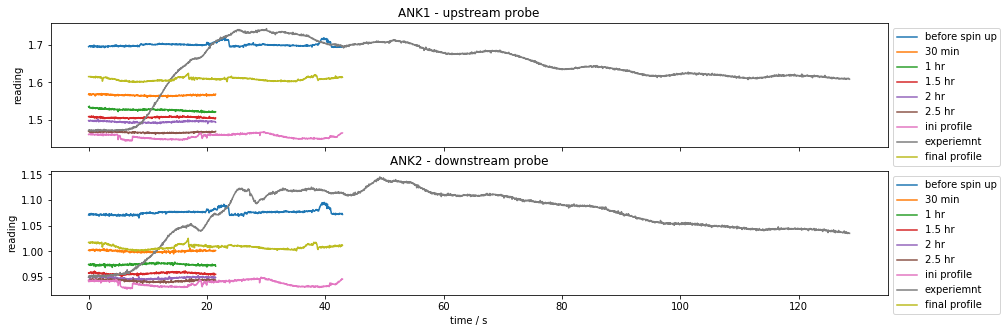

In [45]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(15,5), sharex=True)

labels = ['before spin up', '30 min', '1 hr', '1.5 hr', '2 hr', '2.5 hr','ini profile','experiemnt','final profile']
colors = ['limegreen','rebeccapurple','orangered']

filepaths = ['../../exp_28mar19/profile_before_spinup_2.mat',
             '../../exp_28mar19/checkup_12_30_2.mat',
             '../../exp_28mar19/checkup_13_00_2.mat',
             '../../exp_28mar19/checkup_13_30_2.mat',
             '../../exp_28mar19/checkup_14_00_2.mat',
             '../../exp_28mar19/checkup_14_30_2.mat',
             '../../exp_28mar19/profile_initial_2.mat',
             '../../exp_28mar19/experiment_2.mat',
             '../../exp_28mar19/profile_final_2.mat',
            ]

for filepath, lab in zip(filepaths, labels):
    print(filepath)

    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']# dens_B(mat['ch1'])
    P2 = mat['ch2']#dens_C(mat['ch2'])
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    
ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')

ax1.set_xlabel('time / s')

../../exp_28mar19/profile_before_spinup_2.mat
../../exp_28mar19/profile_initial_2.mat
../../exp_28mar19/experiment_2.mat
../../exp_28mar19/profile_final_2.mat


Text(0.5,0,'time / s')

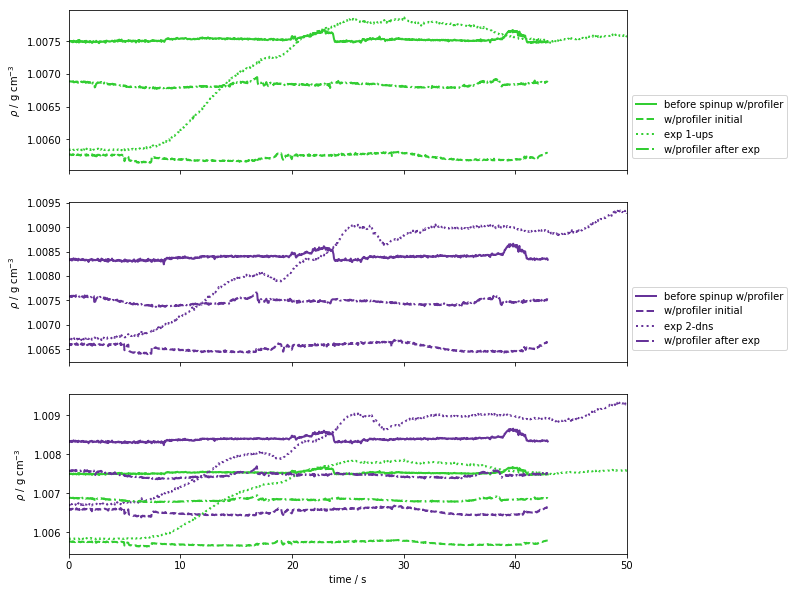

In [46]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(10,10), sharex=True)

labels1 = ['before spinup w/profiler', 'w/profiler initial','exp 1-ups','w/profiler after exp']
labels2 = ['before spinup w/profiler', 'w/profiler initial','exp 2-dns','w/profiler after exp']

colors = ['limegreen','rebeccapurple','orangered','blue']

filepaths = ['../../exp_28mar19/profile_before_spinup_2.mat',
             '../../exp_28mar19/profile_initial_2.mat',
             '../../exp_28mar19/experiment_2.mat',
             '../../exp_28mar19/profile_final_2.mat']

lines = ['-','--',':','-.','-','--']
linewidths = [2,2,2,2,2,2]

for filepath, line, linew, lab1, lab2 in zip(filepaths, lines, linewidths, labels1, labels2):
    print(filepath)

    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1'] 
    P2 = mat['ch2'] 
    density_1 = dens_ANK1(P1)
    density_2 = dens_ANK2(P2)
    
    time = mat['time']
    ax0.plot(time,density_1,linestyle=line ,linewidth = linew, label=lab1, color=colors[0])
    ax1.plot(time,density_2,linestyle=line, linewidth=linew, label=lab2, color=colors[1])
    ax2.plot(time,density_1,linestyle=line ,linewidth = linew, label=lab1, color=colors[0])
    ax2.plot(time,density_2,linestyle=line, linewidth=linew, label=lab2, color=colors[1])
    
ax0.legend(bbox_to_anchor=(1,0.5))
ax1.legend(bbox_to_anchor=(1,0.5))

ax0.set_ylabel(r'$\rho$ / g cm$^{-3}$')
ax1.set_ylabel(r'$\rho$ / g cm$^{-3}$')
ax2.set_ylabel(r'$\rho$ / g cm$^{-3}$')

ax0.set_xlim(0,50)
ax1.set_xlim(0,50)
ax2.set_xlim(0,50)

ax2.set_xlabel('time / s')

Notes:
    
* It does not make sense that water at head depth DNS (purple solid line) has a higher density than the water in bucket 1, that is the densest water at the bottom. Even after drifting, before the experiment, the density at DnS is higher that in bucket 1.
* Density values for UpS are more consistent with measurements at A (1.007 to 1.005 g/cm^3) 
* Density measurments drift towards fresher values with time
* There are some disturbances in the probes at the head of the canyons when profiles are taken.


### Profiles

Text(0,0.5,'$\\rho$ / g cm$^{-3}$')

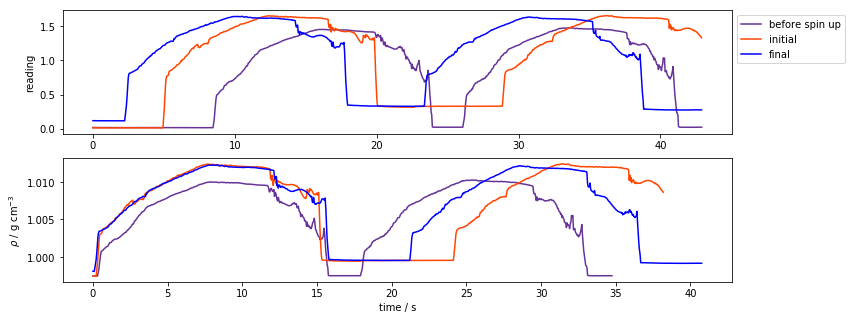

In [47]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,5))

filepath_ini0 = '../../exp_28mar19/profile_before_spinup_2.mat'
filepath_ini = '../../exp_28mar19/profile_initial_2.mat'
filepath_fin = '../../exp_28mar19/profile_final_2.mat'

mat_ini0 = sio.loadmat(filepath_ini0, squeeze_me=True)
mat_ini = sio.loadmat(filepath_ini, squeeze_me=True)
mat_fin = sio.loadmat(filepath_fin, squeeze_me=True)

P_ini0 = mat_ini0['ch3']#dens_C(mat['ch2'])
P_ini = mat_ini['ch3']#dens_C(mat['ch2'])
P_fin = mat_fin['ch3']#dens_C(mat['ch2'])
dens_P_ini0 = densP(mat_ini0['ch3'])
dens_P_ini = densP(mat_ini['ch3'])
dens_P_fin = densP(mat_fin['ch3'])

time_ini0 = mat_ini0['time']
time_ini = mat_ini['time']
time_fin = mat_fin['time']

ax1.plot(time_ini0,P_ini0, label='before spin up', color=colors[1])
ax1.plot(time_ini,P_ini, label='initial', color=colors[2])
ax1.plot(time_fin,P_fin, label='final', color=colors[3])
ax2.plot(time_ini0[190:]-time_ini0[190],dens_P_ini0[190:], label='before spin up', color=colors[1])
ax2.plot(time_ini[110:]-time_ini[110],dens_P_ini[110:], label='initial', color=colors[2])
ax2.plot(time_fin[50:]-time_fin[50],dens_P_fin[50:], label='final', color=colors[3])

ax1.legend(bbox_to_anchor=(1,1))
ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax2.set_xlabel('time / s')
ax2.set_ylabel(r'$\rho$ / g cm$^{-3}$')


Text(0,0.5,'$\\rho$ / g cm$^{-3}$')

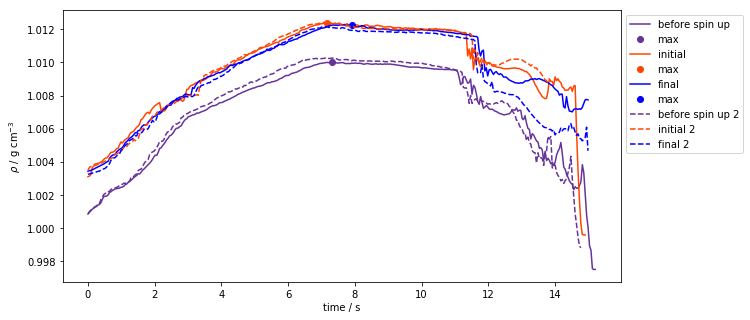

In [48]:
fig, (ax2) = plt.subplots(1,1, figsize=(10,5))

filepath_ini0 = '../../exp_28mar19/profile_before_spinup_2.mat'
filepath_ini = '../../exp_28mar19/profile_initial_2.mat'
filepath_fin = '../../exp_28mar19/profile_final_2.mat'

mat_ini0 = sio.loadmat(filepath_ini0, squeeze_me=True)
mat_ini = sio.loadmat(filepath_ini, squeeze_me=True)
mat_fin = sio.loadmat(filepath_fin, squeeze_me=True)

P_ini0 = mat_ini0['ch3']#dens_C(mat['ch2'])
P_ini = mat_ini['ch3']#dens_C(mat['ch2'])
P_fin = mat_fin['ch3']#dens_C(mat['ch2'])
dens_P_ini0 = densP(mat_ini0['ch3'])
dens_P_ini = densP(mat_ini['ch3'])
dens_P_fin = densP(mat_fin['ch3'])

time_ini0 = mat_ini0['time']
time_ini = mat_ini['time']
time_fin = mat_fin['time']

ax2.plot(time_ini0[205:560]-time_ini0[205],dens_P_ini0[205:560], label='before spin up', color=colors[1])
ind = np.argmax(dens_P_ini0[205:560])
ax2.plot(time_ini0[ind],dens_P_ini0[205:560][ind],'o', label='max', color=colors[1])

ax2.plot(time_ini[122:470]-time_ini[122],dens_P_ini[122:470], label='initial', color=colors[2])
ind = np.argmax(dens_P_ini[122:470])
ax2.plot(time_ini[ind],dens_P_ini[122:470][ind],'o', label='max', color=colors[2])

ax2.plot(time_fin[60:410]-time_fin[60],dens_P_fin[60:410], label='final', color=colors[3])
ind = np.argmax(dens_P_fin[60:410])
ax2.plot(time_fin[ind],dens_P_fin[60:410][ind],'o', label='max', color=colors[3])

ax2.plot(time_ini0[615:960]-time_ini0[615],dens_P_ini0[615:960],'--', label='before spin up 2', color=colors[1])
ax2.plot(time_ini[677:1060]-time_ini[677],dens_P_ini[677:1060],'--', label='initial 2', color=colors[2])
ax2.plot(time_fin[550:900]-time_fin[550],dens_P_fin[550:900],'--', label='final 2', color=colors[3])

ax2.legend(bbox_to_anchor=(1,1))
ax2.set_xlabel('time / s')
ax2.set_ylabel(r'$\rho$ / g cm$^{-3}$')


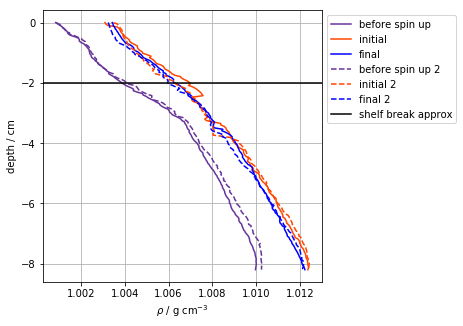

In [49]:
fig, (ax2) = plt.subplots(1,1, figsize=(5,5))

filepath_ini0 = '../../exp_28mar19/profile_before_spinup_2.mat'
filepath_ini = '../../exp_28mar19/profile_initial_2.mat'
filepath_fin = '../../exp_28mar19/profile_final_2.mat'

mat_ini0 = sio.loadmat(filepath_ini0, squeeze_me=True)
mat_ini = sio.loadmat(filepath_ini, squeeze_me=True)
mat_fin = sio.loadmat(filepath_fin, squeeze_me=True)

P_ini0 = mat_ini0['ch3']#dens_C(mat['ch2'])
P_ini = mat_ini['ch3']#dens_C(mat['ch2'])
P_fin = mat_fin['ch3']#dens_C(mat['ch2'])
dens_P_ini0 = densP(mat_ini0['ch3'])
dens_P_ini = densP(mat_ini['ch3'])
dens_P_fin = densP(mat_fin['ch3'])

time_ini0 = mat_ini0['time']
time_ini = mat_ini['time']
time_fin = mat_fin['time']

max_depth=8.2 # cm
ax2.plot(dens_P_ini0[205:380],-time2dist(max_depth,(time_ini0[205:380]-time_ini0[205])), label='before spin up', color=colors[1])

ax2.plot(dens_P_ini[122:292],-time2dist(max_depth,time_ini[122:292]-time_ini[122]), label='initial', color=colors[2])

ax2.plot(dens_P_fin[60:230], -time2dist(max_depth,time_fin[60:230]-time_fin[60]),label='final', color=colors[3])

ax2.plot(dens_P_ini0[615:785],-time2dist(max_depth,time_ini0[615:785]-time_ini0[615]),'--', label='before spin up 2', color=colors[1])
ax2.plot(dens_P_ini[677:847],-time2dist(max_depth,time_ini[677:847]-time_ini[677]),'--', label='initial 2', color=colors[2])
ax2.plot(dens_P_fin[550:720],-time2dist(max_depth,time_fin[550:720]-time_fin[550]),'--', label='final 2', color=colors[3])

ax2.axhline(-2,color='k', label='shelf break approx')
ax2.legend(bbox_to_anchor=(1,1))
ax2.set_ylabel('depth / cm')
ax2.set_xlabel(r'$\rho$ / g cm$^{-3}$')
ax2.grid(axis='both')

These profiles make sense for "initial" and "final" because water at shelf break, according to densimeter,  has density about 1.0065 or higher and water around canyon head depth has density about 1.005. "Before spin up" profile is too fresh. Maybe it is because conductivity depends on temperature and water was cold? (Susan's suggestion. Try letting water on buckets sit overnignt so that when I run the experiment water is always at room temp, 20degC)

### Experiment

../../exp_28mar19/experiment_2.mat


Text(0.5,0,'sample')

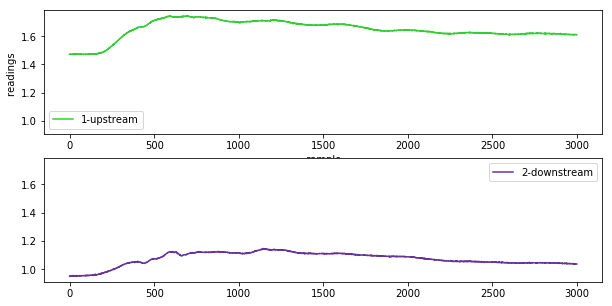

In [50]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,5), sharey=True)
labels = ['1-upstream','2-downstream']

filepath = '../../exp_28mar19/experiment_2.mat'
print(filepath)
    
mat = sio.loadmat(filepath, squeeze_me=True)
P1 = mat['ch1']
P2 = mat['ch2']
time = mat['time']
ax0.plot(P1,'-', label=labels[0], color=colors[0])
ax1.plot(P2,'-', label=labels[1], color=colors[1])


ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel('readings ')
ax0.set_xlabel('sample')

Text(0.5,1,'Probe density minus initial density')

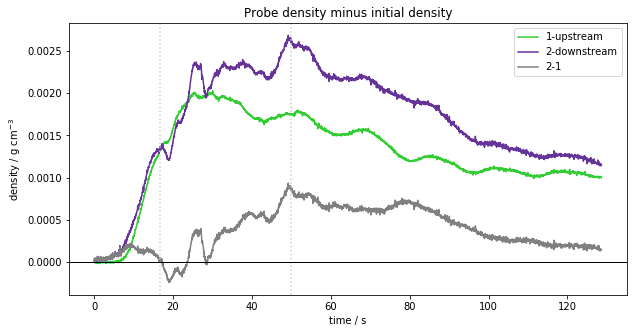

In [51]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

ax0.plot(time,dens_ANK1(P1)-dens_ANK1(P1)[0],'-', label=labels[0], color=colors[0])
ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0],'-', label=labels[1], color=colors[1])
ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0]-(dens_ANK1(P1)-dens_ANK1(P1)[0]),'-', label='2-1', color='0.5')
plot_uprofile(ax0)
ax0.axhline(0,color='k', linewidth=1)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density')


### Comparison between low and high N runs

../../exp_26mar19/experiment.mat


Text(0.5,1,'Density change (from intial values) at canyon heads')

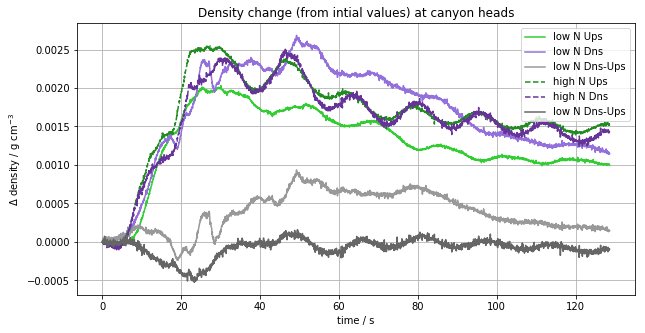

In [52]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)
labels = ['1-upstream','2-downstream']

filepath_high = '../../exp_26mar19/experiment.mat'

print(filepath_high)
    
mat_high = sio.loadmat(filepath_high, squeeze_me=True)
P1_high = mat_high['ch1']
P2_high = mat_high['ch2']
time_high = mat_high['time']

ax0.plot(time,dens_ANK1(P1)-dens_ANK1(P1)[0],'-', label='low N Ups', color='limegreen')
ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0],'-', label='low N Dns', color='mediumpurple')
ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0]-(dens_ANK1(P1)-dens_ANK1(P1)[0]),'-', label='low N Dns-Ups', color='0.6')

ax0.plot(time_high,dens_ANK1(P1_high)-dens_ANK1(P1_high)[0],'--', label='high N Ups', color='forestgreen')
ax0.plot(time_high,dens_ANK2(P2_high)-dens_ANK2(P2_high)[0],'--', label='high N Dns', color='rebeccapurple')
ax0.plot(time_high,dens_ANK2(P2_high)-dens_ANK2(P2_high)[0]-(dens_ANK1(P1_high)-dens_ANK1(P1_high)[0]),
         '-', label='low N Dns-Ups', color='0.4')

ax0.grid(axis='both')
ax0.legend(loc=0)
ax0.set_ylabel('$\Delta$ density / g cm$^{-3}$ ')
ax0.set_xlabel('time / s')
ax0.set_title('Density change (from intial values) at canyon heads')

**Things that make sense to me about this plot:**
* Max density change in canyons with lower N is larger because there should me more upwelling (deeper upwelling depth) than in high N runs. Evident for downstream canyon, not so much for upstream canyon.
* The difference between densities at the canyon heads (which is some evidence of interaction, possibly) is larger for lower N because canyons may be dynamically closer, waves may be moving faster(?)

**Things that don't make sense / I'm not sure about:**
* Is the drift in density during spin up real or from the probes? 
    1. If it is real, I should see a change in the density profile but I don't see a change in shape (shouldn't it smooth out? The surface should diffuse faster because it is more stratified than the bottom...) I only see that the whole water column gets "denser".
    2. The samples at A and B show that density changes in time but not always decreasing
* The calibration of the probes is not good

**Questions**
* Why are oscillations stronger in high N run?
* Why is there a spiky thing after 20 sec in low N Dns?

**Runs for next week:**
* One canyon low N and high N (cover downstream canyon)
* The obvious experiment to see if probes are drifting is to stick a probe in a beaker with salty water and measure every 30 min. No stratifiacation.

In [53]:
# diffusivity length scale for time scale T

Ks = 1E-9 # m^2s^-1
T = 3600 # sec (1 hour)

L = np.sqrt(T*Ks)

print('Assuming Ks O(10^{-9} m^2s^{-1}) and T is about 3600 s (1 hour), then the diffusion length scale L is about %1.0e m ' %L)

Assuming Ks O(10^{-9} m^2s^{-1}) and T is about 3600 s (1 hour), then the diffusion length scale L is about 2e-03 m 
